In [14]:
!pip install datasist

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.0 MB/s eta 0:00:00


In [20]:
!pip install xgboost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
from datasist.structdata import detect_outliers

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold, cross_val_score , RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv(r"/content/heart_failure_clinical_records_dataset.csv")

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.isnull().sum().sort_values(ascending=False)

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
data['DEATH_EVENT'].value_counts()

,count
DEATH_EVENT,
0,203
1,96


In [10]:
columns = list(data.columns)
columns.remove('DEATH_EVENT')
columns

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time']

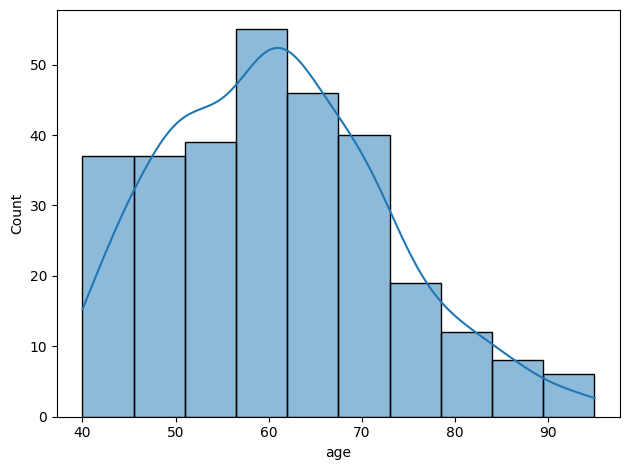

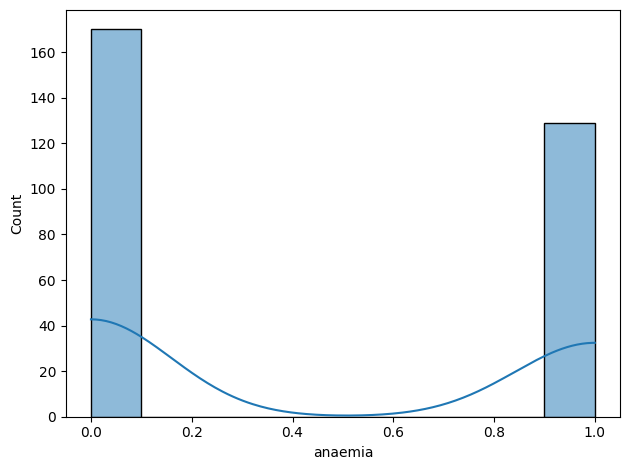

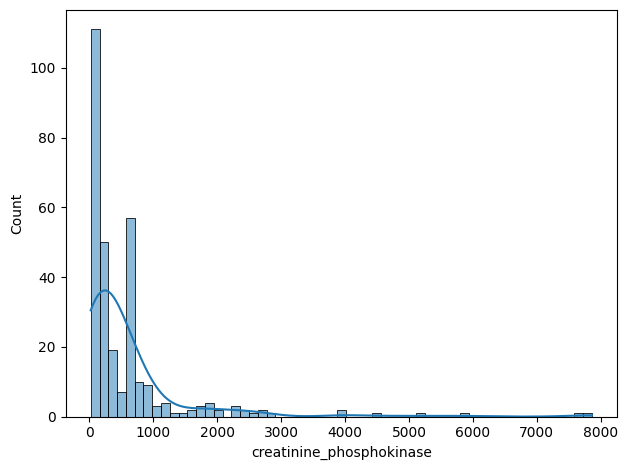

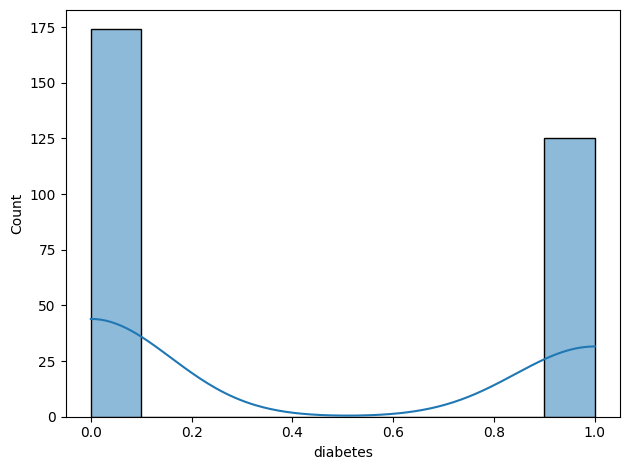

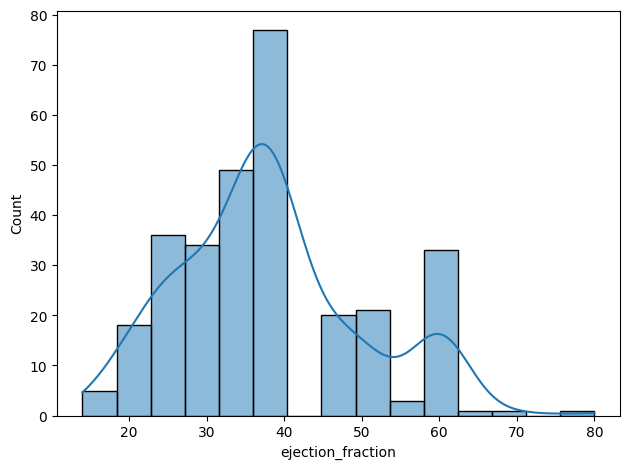

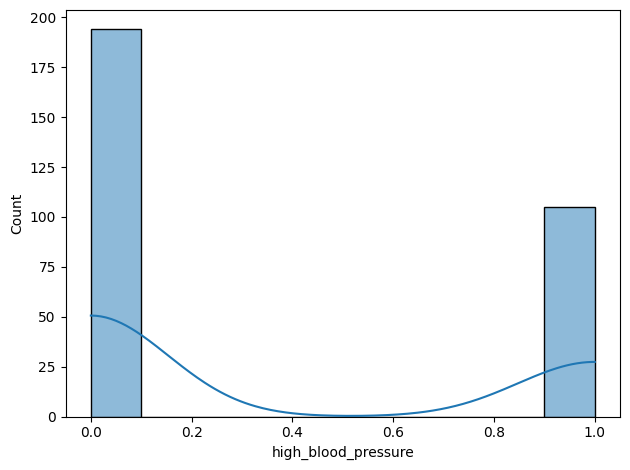

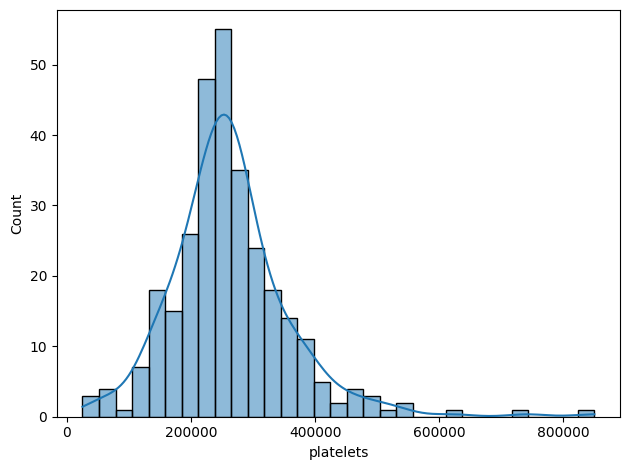

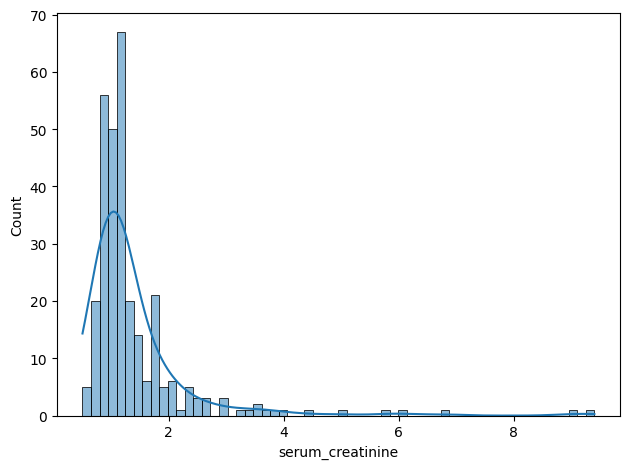

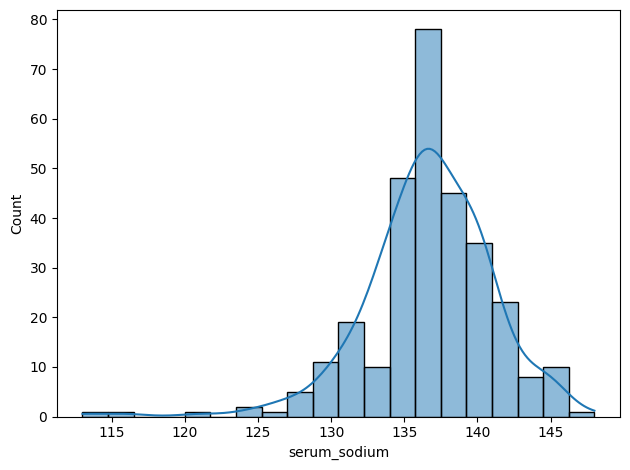

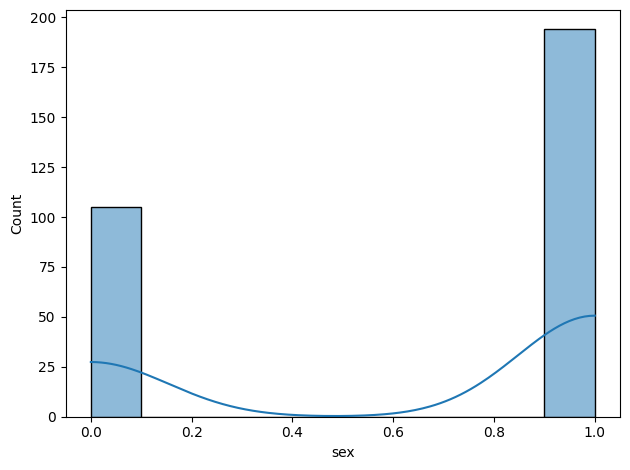

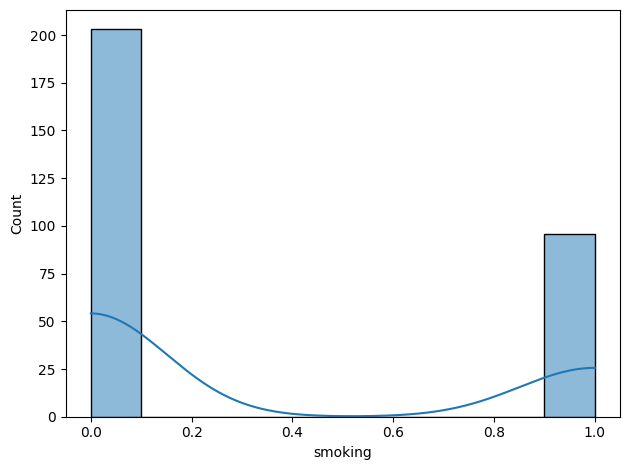

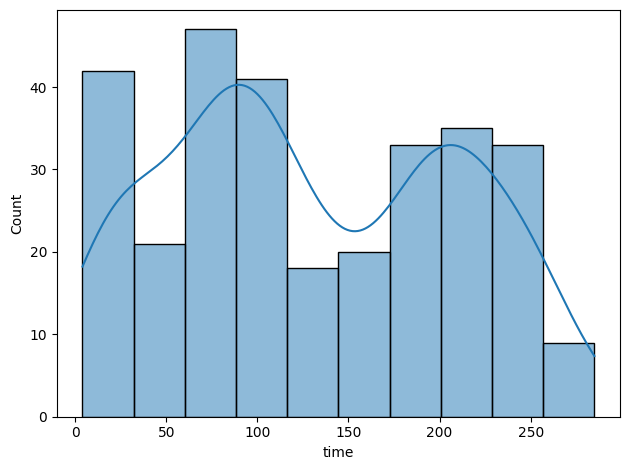

In [13]:
for col in columns:
  sns.histplot(data=data,x=col,kde=True)
  plt.tight_layout()
  plt.show()

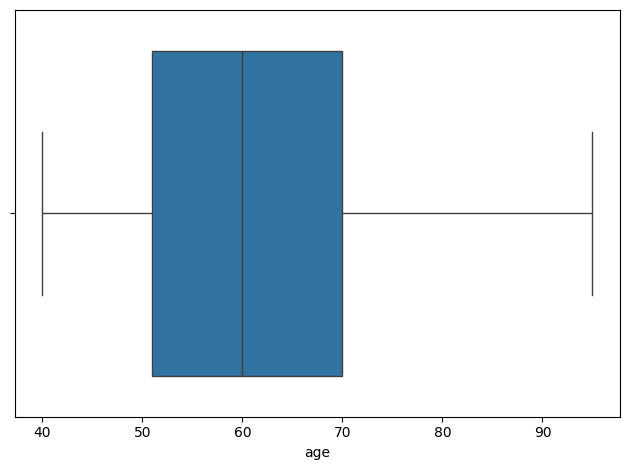

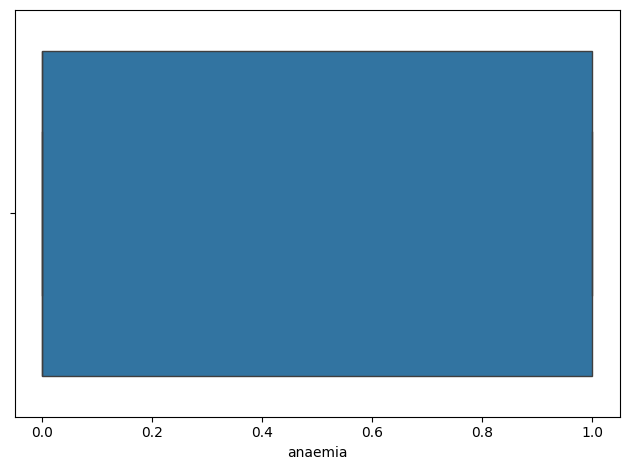

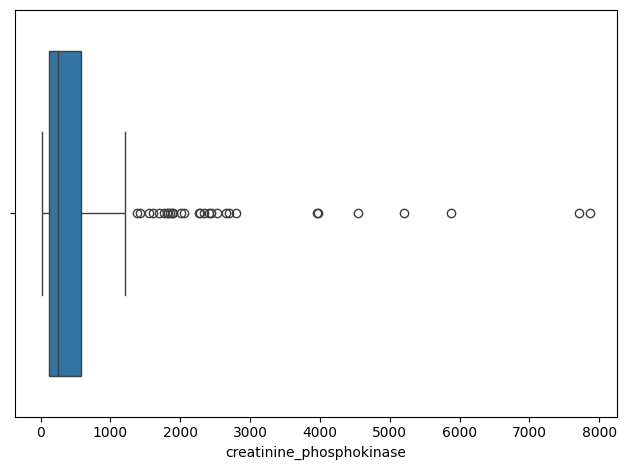

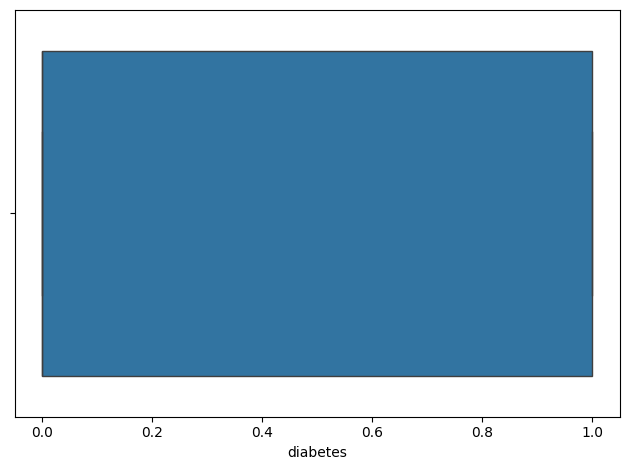

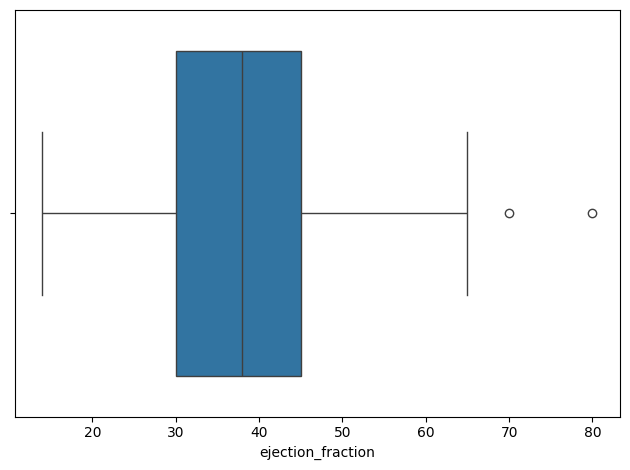

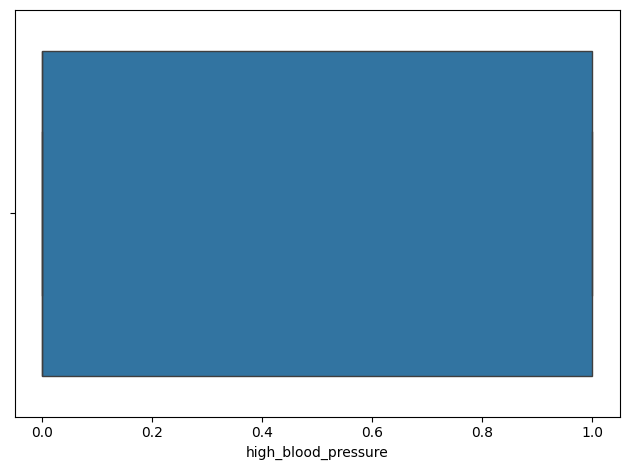

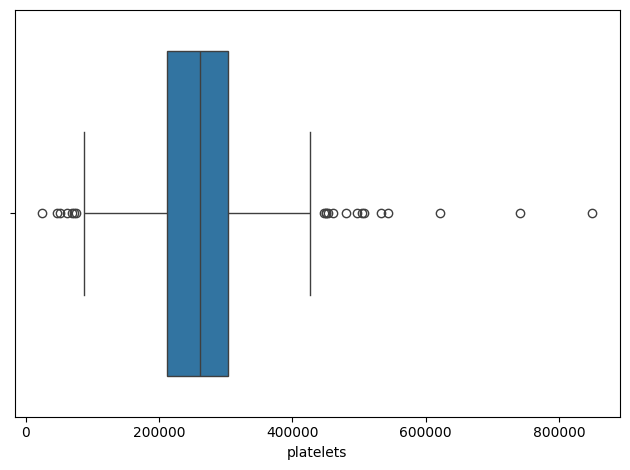

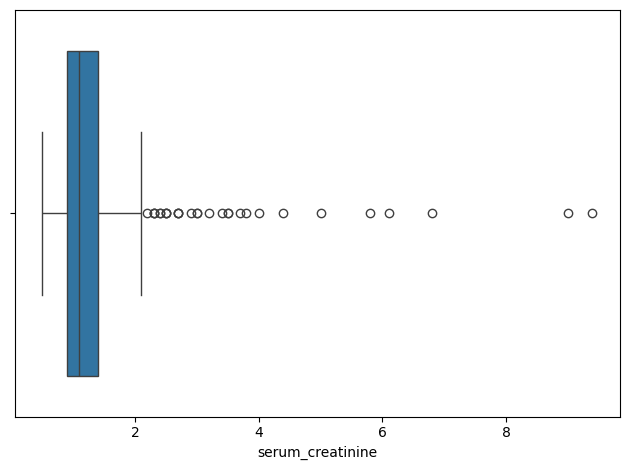

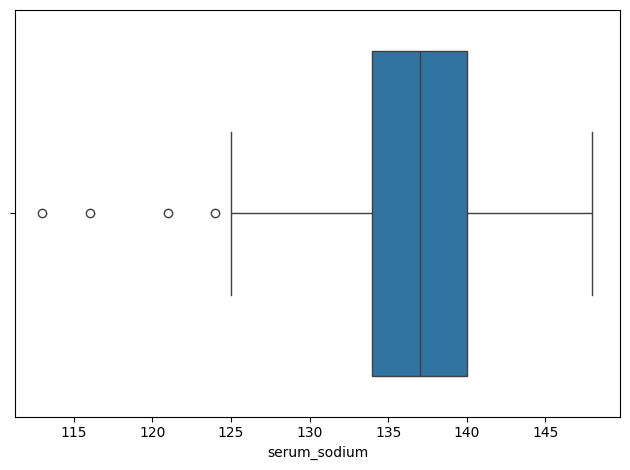

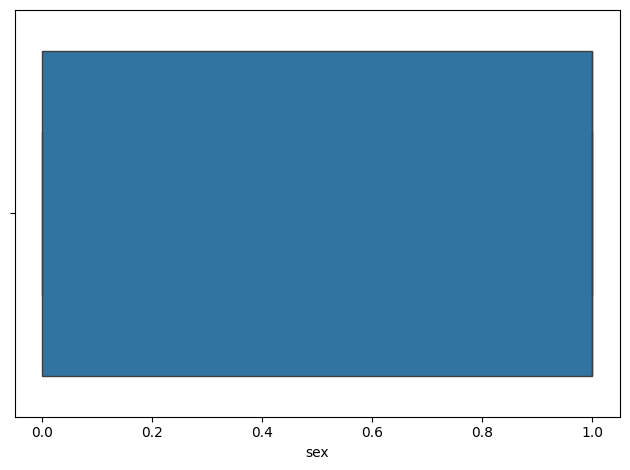

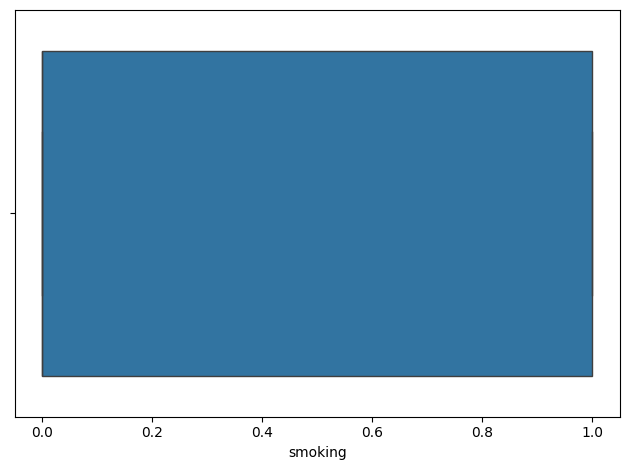

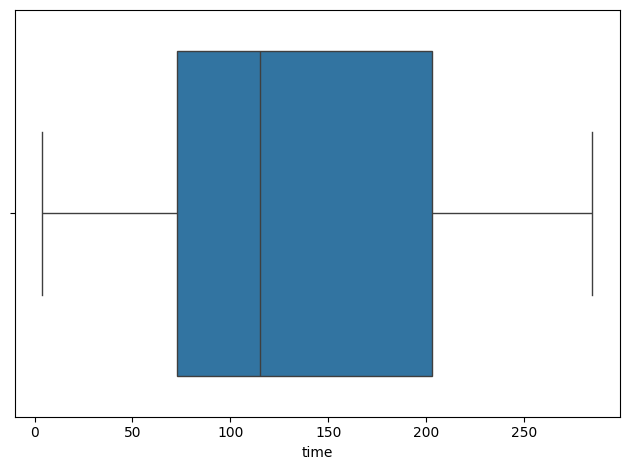

In [16]:
for col in columns:
  sns.boxplot(data=data,x=col)
  plt.tight_layout()
  plt.show()

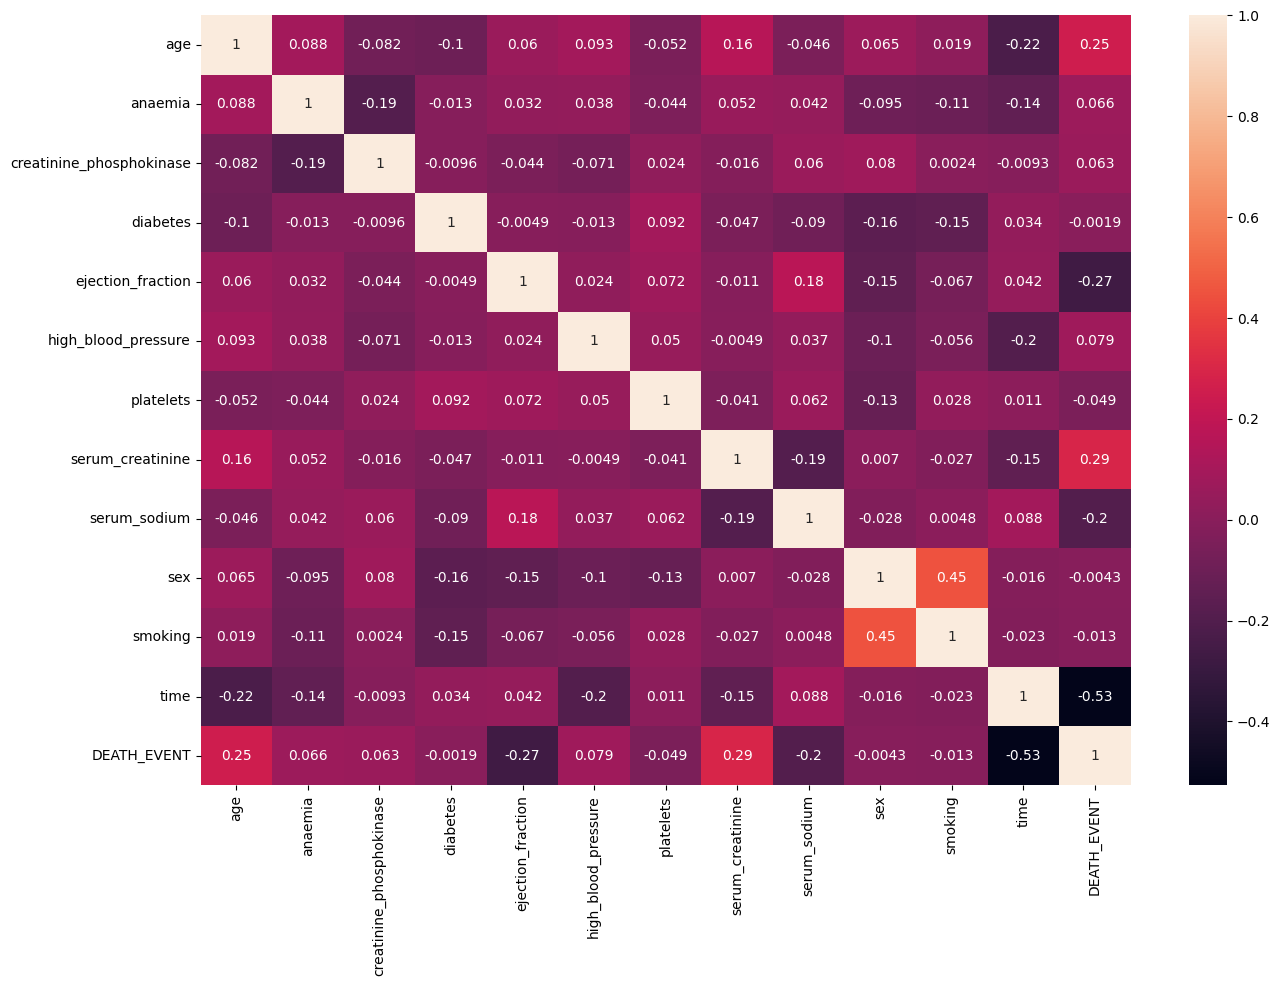

In [17]:
correlation = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True)
plt.show()

In [23]:
X = data.drop("DEATH_EVENT", axis=1)
y = data["DEATH_EVENT"]

In [24]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [25]:
list_of_models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]

In [27]:

for model in list_of_models:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    scores = cross_val_score(pipe, X, y, cv=cv, scoring='roc_auc')

    print(f"Model: {model.__class__.__name__}")
    print("ROC AUC scores for each fold:", scores)
    print("Mean ROC AUC:", scores.mean())
    print(f"\n {'#'*100}")

Model: LogisticRegression
ROC AUC scores for each fold: [0.84125    0.84467266 0.90243902 0.92169448 0.86447368]
Mean ROC AUC: 0.874905969191271

 ####################################################################################################
Model: KNeighborsClassifier
ROC AUC scores for each fold: [0.778125   0.80038511 0.66046213 0.73299101 0.78092105]
Mean ROC AUC: 0.7505768613607189

 ####################################################################################################
Model: SVC
ROC AUC scores for each fold: [0.82375    0.82926829 0.8677792  0.91014121 0.87236842]
Mean ROC AUC: 0.8606614249037227

 ####################################################################################################
Model: GaussianNB
ROC AUC scores for each fold: [0.81875    0.81771502 0.83825417 0.90629012 0.87631579]
Mean ROC AUC: 0.8514650192554557

 ####################################################################################################
Model: DecisionTreeClassif

In [28]:

for model in list_of_models:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    scores = cross_val_score(pipe, X, y, cv=cv, scoring='accuracy')

    print(f"Model: {model.__class__.__name__}")
    print("ROC AUC scores for each fold:", scores)
    print("Mean ROC AUC:", scores.mean())
    print(f"\n {'#'*100}")

Model: LogisticRegression
ROC AUC scores for each fold: [0.8        0.86666667 0.86666667 0.88333333 0.76271186]
Mean ROC AUC: 0.8358757062146893

 ####################################################################################################
Model: KNeighborsClassifier
ROC AUC scores for each fold: [0.75       0.78333333 0.7        0.76666667 0.71186441]
Mean ROC AUC: 0.7423728813559322

 ####################################################################################################
Model: SVC
ROC AUC scores for each fold: [0.75       0.81666667 0.81666667 0.85       0.79661017]
Mean ROC AUC: 0.8059887005649717

 ####################################################################################################
Model: GaussianNB
ROC AUC scores for each fold: [0.73333333 0.76666667 0.78333333 0.83333333 0.76271186]
Mean ROC AUC: 0.7758757062146893

 ####################################################################################################
Model: DecisionTreeClassi

In [29]:

for model in list_of_models:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    scores = cross_val_score(pipe, X, y, cv=cv, scoring='f1')

    print(f"Model: {model.__class__.__name__}")
    print("ROC AUC scores for each fold:", scores)
    print("Mean ROC AUC:", scores.mean())
    print(f"\n {'#'*100}")

Model: LogisticRegression
ROC AUC scores for each fold: [0.68421053 0.77777778 0.78947368 0.78787879 0.58823529]
Mean ROC AUC: 0.7255152140601058

 ####################################################################################################
Model: KNeighborsClassifier
ROC AUC scores for each fold: [0.48275862 0.58064516 0.30769231 0.5        0.4516129 ]
Mean ROC AUC: 0.46454179857961836

 ####################################################################################################
Model: SVC
ROC AUC scores for each fold: [0.59459459 0.7027027  0.66666667 0.72727273 0.64705882]
Mean ROC AUC: 0.6676591029532205

 ####################################################################################################
Model: GaussianNB
ROC AUC scores for each fold: [0.52941176 0.5625     0.58064516 0.66666667 0.53333333]
Mean ROC AUC: 0.5745113851992409

 ####################################################################################################
Model: DecisionTreeClass

In [30]:

for model in list_of_models:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    scores = cross_val_score(pipe, X, y, cv=cv, scoring='recall')

    print(f"Model: {model.__class__.__name__}")
    print("ROC AUC scores for each fold:", scores)
    print("Mean ROC AUC:", scores.mean())
    print(f"\n {'#'*100}")

Model: LogisticRegression
ROC AUC scores for each fold: [0.65       0.73684211 0.78947368 0.68421053 0.52631579]
Mean ROC AUC: 0.6773684210526316

 ####################################################################################################
Model: KNeighborsClassifier
ROC AUC scores for each fold: [0.35       0.47368421 0.21052632 0.36842105 0.36842105]
Mean ROC AUC: 0.3542105263157895

 ####################################################################################################
Model: SVC
ROC AUC scores for each fold: [0.55       0.68421053 0.57894737 0.63157895 0.57894737]
Mean ROC AUC: 0.6047368421052632

 ####################################################################################################
Model: GaussianNB
ROC AUC scores for each fold: [0.45       0.47368421 0.47368421 0.52631579 0.42105263]
Mean ROC AUC: 0.4689473684210526

 ####################################################################################################
Model: DecisionTreeClassi

In [31]:

for model in list_of_models:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    scores = cross_val_score(pipe, X, y, cv=cv, scoring='precision')

    print(f"Model: {model.__class__.__name__}")
    print("ROC AUC scores for each fold:", scores)
    print("Mean ROC AUC:", scores.mean())
    print(f"\n {'#'*100}")

Model: LogisticRegression
ROC AUC scores for each fold: [0.72222222 0.82352941 0.78947368 0.92857143 0.66666667]
Mean ROC AUC: 0.78609268268711

 ####################################################################################################
Model: KNeighborsClassifier
ROC AUC scores for each fold: [0.77777778 0.75       0.57142857 0.77777778 0.58333333]
Mean ROC AUC: 0.692063492063492

 ####################################################################################################
Model: SVC
ROC AUC scores for each fold: [0.64705882 0.72222222 0.78571429 0.85714286 0.73333333]
Mean ROC AUC: 0.7490943043884221

 ####################################################################################################
Model: GaussianNB
ROC AUC scores for each fold: [0.64285714 0.69230769 0.75       0.90909091 0.72727273]
Mean ROC AUC: 0.7443056943056943

 ####################################################################################################
Model: DecisionTreeClassifie